In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Required by Jupyter for inlining images
%matplotlib inline

In [14]:
SPSIntensity = pd.read_csv('../Data/SPS_intensity_B1.txt',sep=' ', header=None)
SPSIntensity.columns = ['Time Stamp','Reading']
#SPS Intensity is the Intensity right before Extraction
#Intensity - Number of bunches
#Measured in /cm(s)

In [15]:
len(SPSIntensity['Time Stamp'])

1624

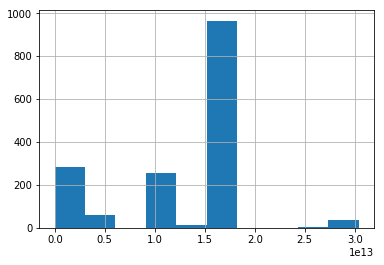

In [16]:
SPSIntensity['Reading'].hist()

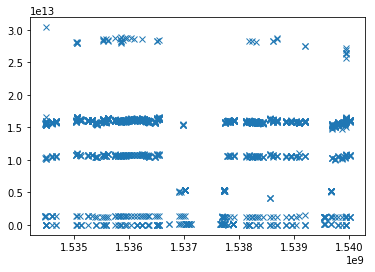

In [17]:
plt.plot(SPSIntensity['Time Stamp'],SPSIntensity['Reading'],'x')

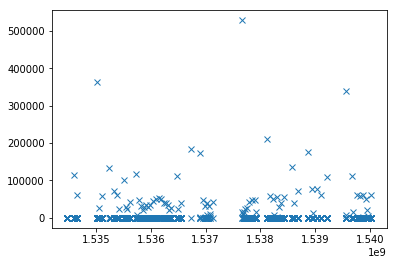

In [23]:
Gap = []
previous = 0
for i in range(0,1624):
    Gap.append(SPSIntensity['Time Stamp'][i]-previous)
    previous = SPSIntensity['Time Stamp'][i]
    
SPSIntensity['Gap'] = Gap
plt.plot(SPSIntensity['Time Stamp'].drop(0,axis=0),SPSIntensity['Gap'].drop(0,axis=0),'x')

In [26]:
cond = SPSIntensity['Gap']>25200
Data = SPSIntensity[cond]

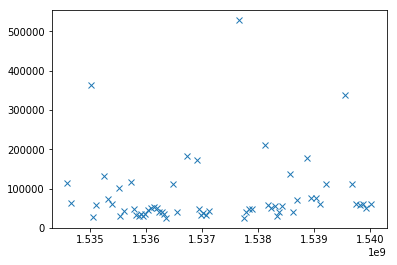

In [27]:
plt.plot(Data['Time Stamp'].drop(0,axis=0),Data['Gap'].drop(0,axis=0),'x')

In [28]:
len(Data['Time Stamp'])

63

In [10]:
SPSIntensity['Time Stamp'][i]-previous

0.0

In [4]:
LHCdata = pd.read_csv('../Data/LHC_intensity_B1.txt',sep=' ', header=None)
LHCdata.columns = ['Time Stamp','Reading']

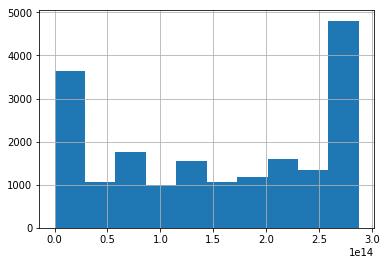

In [6]:
LHCdata['Reading'].hist()

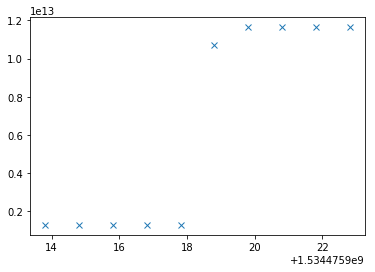

In [4]:
plt.plot(LHCdata['Time Stamp'][10:20],LHCdata['Reading'][10:20],'x')
#This is the cumulative intensity
#As we can see, the readings are taken 10s around
#each injection.

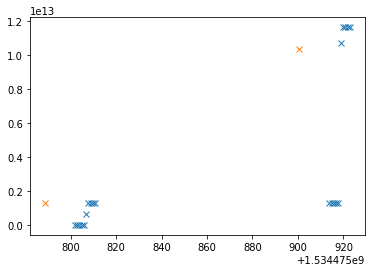

In [8]:
plt.figure()
plt.plot(LHCdata['Time Stamp'][:20],LHCdata['Reading'][:20],'x')
plt.plot(SPSIntensity['Time Stamp'][:2],SPSIntensity['Reading'][:2],'x')
#Also the SPS Intensity injection is happening right before the jump
#in the LHC cumulative intensity readings

In [5]:
#This function calculates the spike jump for each SPS injection into the LHC
def calculateSpikeJump(LHCdata):
    differences = []
    times = []
    cntr = 0
    while cntr<len(LHCdata['Reading']):
        #print(cntr)
        dataSlice = LHCdata[cntr:cntr+10]
        differences.append(max(dataSlice['Reading'])-min(dataSlice['Reading']))
        times.append(dataSlice['Time Stamp'][cntr+5])
        cntr = cntr+10
    data = {'Time Stamp':times,'Reading':differences}
    return pd.DataFrame(data=data)

In [6]:
LHCDifferences = calculateSpikeJump(LHCdata)

In [7]:
print(LHCDifferences.describe(),SPSIntensity.describe())

         Time Stamp       Reading
count  1.898000e+03  1.898000e+03
mean   1.537150e+09  1.819257e+13
std    1.675604e+06  4.579043e+13
min    1.534476e+09  1.474855e+10
25%    1.535796e+09  4.622767e+11
50%    1.536506e+09  1.557033e+13
75%    1.538614e+09  1.598824e+13
max    1.540021e+09  2.844247e+14          Time Stamp       Reading
count  1.890000e+03  1.890000e+03
mean   1.537151e+09  1.339114e+13
std    1.676257e+06  7.734543e+12
min    1.534476e+09 -1.886400e+10
25%    1.535796e+09  1.054616e+13
50%    1.536506e+09  1.582454e+13
75%    1.538614e+09  1.610514e+13
max    1.540021e+09  3.312519e+13


In [7]:
#We need a smart way to merge the 2 datasets
#since SPS has 8 missing readings somewher
np.histogram((SPSIntensity['Time Stamp'][0:200] -LHCDifferences['Time Stamp'][0:200]).values)

(array([102,  34,   2,  20,   0,  29,   0,   0,   0,  13]),
 array([-1.83369999e+01,  3.65156197e+04,  7.30495764e+04,  1.09583533e+05,
         1.46117490e+05,  1.82651447e+05,  2.19185403e+05,  2.55719360e+05,
         2.92253317e+05,  3.28787273e+05,  3.65321230e+05]))

In [8]:
##BE CAREFUL WHEN RE RUNNING, I ACCIDENTLY DELETED ONE OF THE ROWS TO DROP
##SO CHECK DATA BEFORE DROPPING!!

#remove bad rows
LHCDifferences = LHCDifferences.drop(276)
LHCDifferences.index = range(len(LHCDifferences))

In [9]:
LHCDifferences = LHCDifferences.drop(331)
LHCDifferences.index = range(len(LHCDifferences))

In [10]:
LHCDifferences = LHCDifferences.drop(614)
LHCDifferences.index = range(len(LHCDifferences))

In [11]:
LHCDifferences = LHCDifferences.drop(981)
LHCDifferences.index = range(len(LHCDifferences))

In [50]:
LHCDifferences = LHCDifferences.drop(1244)
LHCDifferences.index = range(len(LHCDifferences))

In [56]:
LHCDifferences = LHCDifferences.drop(1505)
LHCDifferences.index = range(len(LHCDifferences))

In [58]:
LHCDifferences = LHCDifferences.drop(1584)
LHCDifferences.index = range(len(LHCDifferences))

In [63]:
len(LHCDifferences)-len(SPSIntensity)
#Perfect, they now match

0

In [16]:
data = pd.DataFrame({'LHC':LHCDifferences['Reading'],'SPS':SPSIntensity['Reading']})


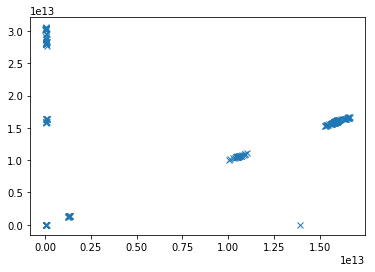

In [13]:
plt.plot(data['LHC'],data['SPS'],'x')
#Expected Correlation here

In [12]:
#Just take the first 200 readings of the original dataset for now
#This is done instead of editing the dataset(as can be seen done above)
data = pd.DataFrame({'LHC':LHCDifferences['Reading'][:200],'SPS':SPSIntensity['Reading'][:200]})